<a href="https://colab.research.google.com/github/swanand19/DL/blob/main/DL-3%3ACNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

170498071/170498071 [==============================] - 3s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

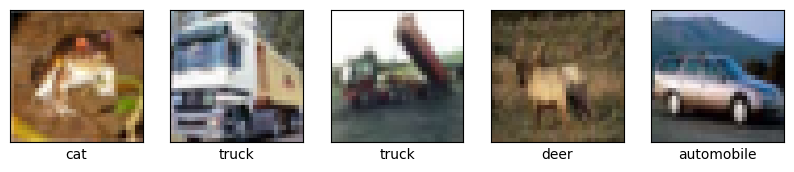

In [4]:
class_names = ['airplane', 'automobile', 'dog', 'frog', 'deer', 'bird', 'cat', 'horse', 'ship', 'truck']
plt.figure(figsize = (10,10))
for i in range(5):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
model.compile(optimizer="adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels) )

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.5261 - accuracy: 0.4444 - val_loss: 1.2632 - val_accuracy: 0.5506
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1588 - accuracy: 0.5874 - val_loss: 1.0752 - val_accuracy: 0.6233
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9994 - accuracy: 0.6503 - val_loss: 0.9861 - val_accuracy: 0.6548
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8910 - accuracy: 0.6897 - val_loss: 0.9223 - val_accuracy: 0.6783
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8198 - accuracy: 0.7148 - val_loss: 0.9048 - val_accuracy: 0.6927
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7604 - accuracy: 0.7331 - val_loss: 0.8682 - val_accuracy: 0.7044
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7138 - accuracy: 0.7523 - val_loss: 0.8600 -

313/313 - 4s - loss: 0.8572 - accuracy: 0.7189 - 4s/epoch - 14ms/step


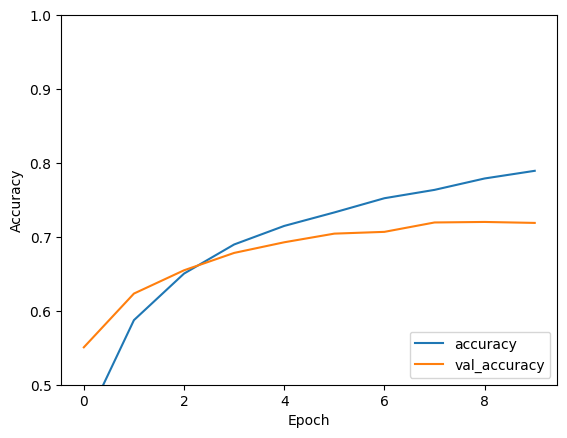

In [13]:
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5,1])
plt.legend(loc = 'lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)